In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
# Visualization settings
from matplotlib import rcParams
fontsize = 12 
color_map = None  

rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 300
rcParams["figure.figsize"] = (6, 4)

rcParams["lines.linewidth"] = 1.5
rcParams["lines.markersize"] = 6
rcParams["lines.markeredgewidth"] = 1

rcParams["font.sans-serif"] = ["Arial", "Helvetica", "DejaVu Sans", "Bitstream Vera Sans", "sans-serif"]
labelsize = 0.92 * fontsize
rcParams["font.size"] = fontsize
rcParams["legend.fontsize"] = labelsize
rcParams["axes.titlesize"] = fontsize
rcParams["axes.labelsize"] = labelsize

rcParams["legend.numpoints"] = 1
rcParams["legend.scatterpoints"] = 1
rcParams["legend.handlelength"] = 0.5
rcParams["legend.handletextpad"] = 0.4
rcParams["pdf.fonttype"] = 42

rcParams["axes.linewidth"] = 0.8
rcParams["axes.edgecolor"] = "black"
rcParams["xtick.color"] = "k"
rcParams["ytick.color"] = "k"
rcParams["xtick.labelsize"] = labelsize
rcParams["ytick.labelsize"] = labelsize

rcParams["grid.color"] = ".8"
rcParams["image.cmap"] = "Reds" if color_map is None else color_map

sns.set_style('white')

In [4]:
# 1. Load both the expression data and the labels using the pandas library.
data = pd.read_csv('geneMatrix_dfSample/data.csv', index_col=0)
labels = pd.read_csv('geneMatrix_dfSample/labels.csv', index_col=0)

# Align samples between data and labels to ensure consistency
data = data.loc[labels.index]
X = data.values  # Feature matrix (samples × genes)
y_str = labels.iloc[:, 0].values  # Label vector (cancer subtypes)

le = LabelEncoder()
y = le.fit_transform(y_str)  # Numerical labels: 0/1

In [5]:
# 2. Split train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42, 
    stratify=y  # Maintain subtype proportion
)

In [6]:
# 3. Train Logistic Regression
# Use saga solver for high-dimensional data + increase max_iter to avoid convergence issues
lr = LogisticRegression(solver='saga', max_iter=100, random_state=42)
lr.fit(X_train, y_train)

/home/wangshouwenLab/yuweiting/miniconda3/envs/snapatac_zhengyi/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=42, solver='saga')

In [7]:
# 4. Evaluate accuracy
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 0.9950


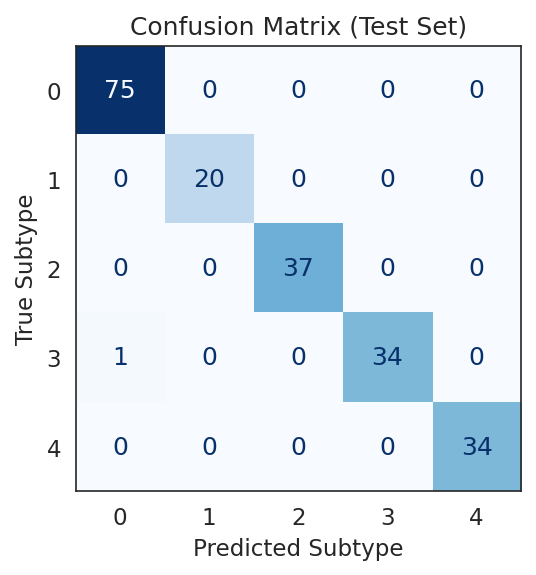

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Subtype')
plt.ylabel('True Subtype')
plt.tight_layout()
plt.show()

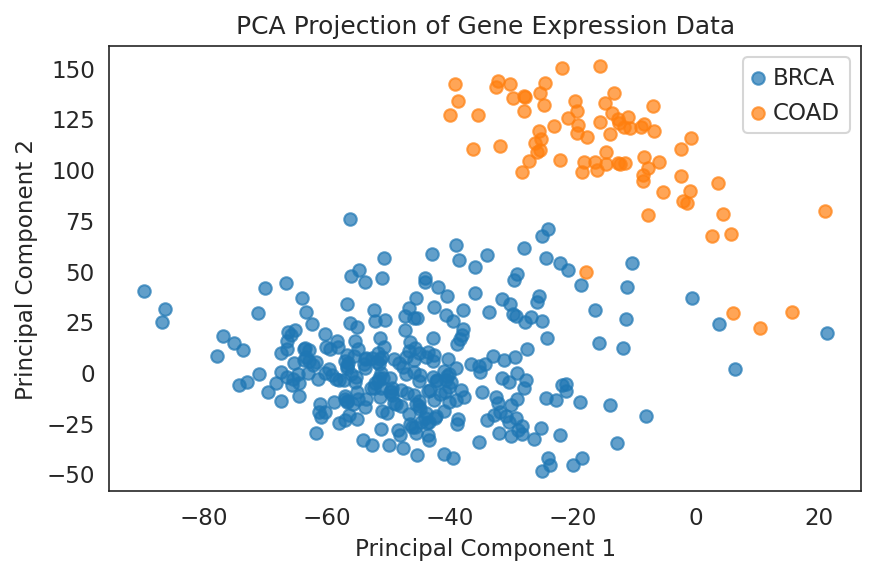


Conclusion: The PCA visualization shows the two subtypes form distinct clusters, indicating they are largely linearly separable based on gene expression profiles.


In [16]:
# 5. PCA + Visualization
# PCA dimensionality reduction (2 components)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

label_mapping = {
    0: 'BRCA',
    1: 'COAD',
    2: 'KIRC',
    3: 'LUAD',
    4: 'PRAD'
}

# Create PCA scatter plot (color by subtype)
plt.figure()
unique_subtypes = np.unique(y)
colors = ['#1f77b4', '#ff7f0e']  # Distinct colors for Subtype A/B
for num_subtype, color in zip(unique_subtypes, colors):
    original_subtype = label_mapping[num_subtype]
    mask = y == num_subtype
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color, label=original_subtype, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Gene Expression Data')
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion on linear separability
print("\nConclusion: The PCA visualization shows the two subtypes form distinct clusters, indicating they are largely linearly separable based on gene expression profiles.")

In [11]:
print("Label Encoding Mapping:")
for num, label in enumerate(le.classes_):
    print(f"  Numerical label {num} → Original subtype: {label}")

Label Encoding Mapping:
  Numerical label 0 → Original subtype: BRCA
  Numerical label 1 → Original subtype: COAD
  Numerical label 2 → Original subtype: KIRC
  Numerical label 3 → Original subtype: LUAD
  Numerical label 4 → Original subtype: PRAD
